# Project Name -

Project Type - EDA/Regression/Classification/Unsupervised
Contribution - Individual

# Project Summary -
The primary goal of this project is to explore and analyze Airbnb listing data to extract meaningful insights that can support business decision-making. By leveraging over 49,000 observations containing both categorical and numerical features, we aim to understand guest and host behavior, pricing trends, market demand, and geographical distribution. These insights can inform strategies to enhance customer experience, optimize revenue, and identify opportunities for growth across different market segments.



# Problem Statement



business objective :-
To analyze Airbnb listing data in order to identify key patterns in room type preferences, pricing trends, geographical distribution, and host performance. The goal is to generate actionable insights that will help improve occupancy rates, maximize host revenue, enhance guest experience, and support data-driven decision-making for future business expansion and marketing strategies.

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read the dataset
read_airbnb_nyc2019 = pd.read_csv('/content/drive/MyDrive/eda/airbnb_nyc2019.csv')

read_airbnb_nyc2019


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#create dataframe
airbnb_df = pd.read_csv('/content/drive/MyDrive/eda/airbnb_nyc2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Dataset First View

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Dataset Rows & Columns count

In [ ]:
airbnb_df.shape

(48895, 16)

***Dataset Information***

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

***Duplicate Values***

In [ ]:
airbnb_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
48890,False
48891,False
48892,False
48893,False


***Missing Values/Null Values***

In [ ]:
airbnb_df.isnull()
airbnb_df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


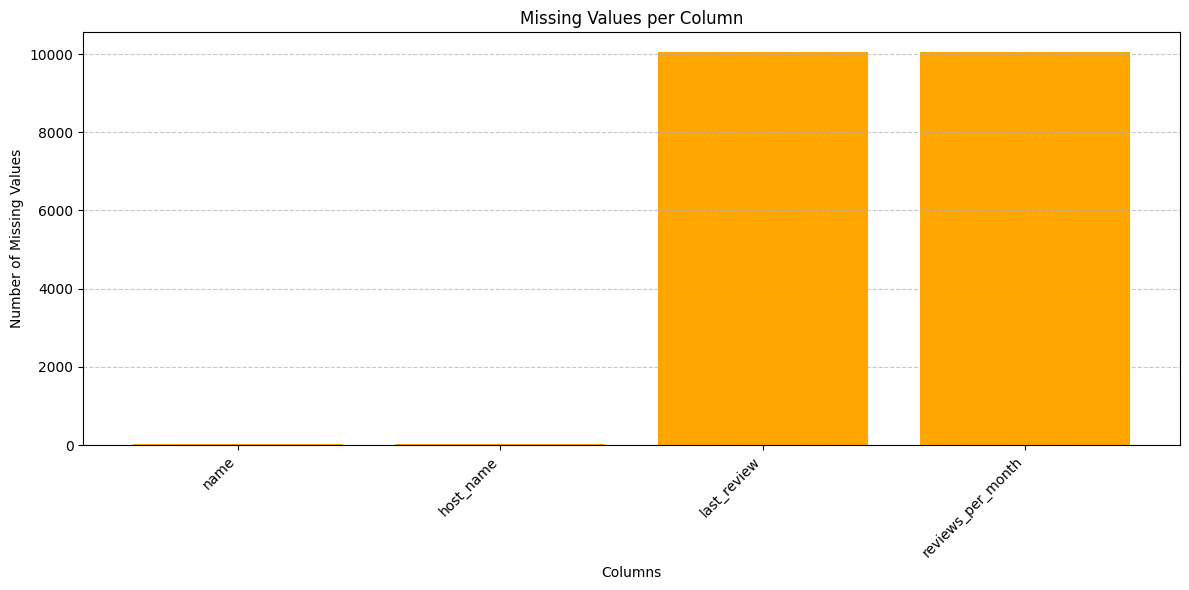

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate missing values
missing_counts = airbnb_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Keep only columns with missing values

# Step 2: Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(missing_counts.index, missing_counts.values, color='orange')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Dataset information***

Major Contributors to Missing Data:

last_review and reviews_per_month each have ~10,000 missing values — by far the most.

Minor Missing Values:

name and host_name have very few missing entries (almost negligible compared to others).



***understanding your variables***

In [ ]:
# Dataset Columns
airbnb_df.columns
list(airbnb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#variable description
Some listings have very high prices (e.g. max = 10,000).

reviews_per_month has fewer entries (count=38843), meaning some listings have no reviews, which leads to missing values.

availability_365 ranges from 0 to 365, showing some listings are never available, and some are available year-round.

minimum_nights has outliers like 1250 nights, which likely indicates data quality issues.

# checking unique values

In [ ]:
airbnb_df['id'].unique()

array([    2539,     2595,     3647, ..., 36485431, 36485609, 36487245])

In [ ]:
airbnb_df['name'].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [ ]:
airbnb_df['host_id'].unique()

array([     2787,      2845,      4632, ..., 274321313,  23492952,
        68119814])

In [ ]:
airbnb_df['host_name'].unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [ ]:
airbnb_df['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb_df['neighbourhood'].unique()


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
airbnb_df['latitude'].unique()


array([40.64749, 40.75362, 40.80902, ..., 40.80953, 40.70184, 40.81475])

In [ ]:
airbnb_df['longitude'].unique()

array([-73.97237, -73.98377, -73.9419 , ..., -73.87727, -73.93614,
       -73.80844])

In [ ]:
airbnb_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
airbnb_df['price'].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [ ]:
airbnb_df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

In [ ]:
airbnb_df['number_of_reviews'].unique()

array([  9,  45,   0, 270,  74,  49, 430, 118, 160,  53, 188, 167, 113,
        27, 148, 198, 260, 130,  39,  71,  88,  19,  58, 108,  29, 242,
       197, 273, 168, 231, 214, 245,  15,  25,  81,  97,  11, 248,  61,
       135, 112,  73,  82, 328, 105, 289, 138,  21,  42,   5,  66, 143,
       191,   4, 338, 106, 190,  23, 142,  54,  70,  16,  94, 194,   2,
       174,  24, 166,   1,  30, 139, 233,  68,  46, 335, 162, 170, 334,
        12, 467,   7,  38, 324, 115, 354, 195,  13,  36,  63, 155, 193,
        32,  50,  26, 426, 227,  84,   3,  10, 124, 240, 200,  79,  34,
       134, 126, 234, 202,  28, 309,  14,  80, 294, 150,  47, 219, 114,
       213,  86,  18, 206, 122,  33,  52,  51, 199,  41, 109, 151, 285,
       375,   6, 358, 226, 104, 204, 253, 129,  37,  69, 192,  17, 222,
       205, 458, 183, 189, 127,  35, 171,  92, 238,  56, 111, 147, 177,
       185,  62, 181, 333, 441, 279, 203, 210,  64, 132,  20,  67, 187,
        22,  93,  48, 120,  43,  59,  31, 220, 286, 398,  76, 18

In [ ]:
airbnb_df['last_review'].unique()

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [ ]:
airbnb_df['calculated_host_listings_count'].unique()


array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [ ]:
airbnb_df['availability_365'].unique()


array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4

# **DATA WRANGLING**

*HOST_ID*

In [ ]:
#NO OF LISTINGS PER HOST

listings_per_host = airbnb_df['host_id'].value_counts().reset_index()
listings_per_host.columns = ['host_id', 'number_of_listings']
print(listings_per_host.head())


     host_id  number_of_listings
0  219517861                 327
1  107434423                 232
2   30283594                 121
3  137358866                 103
4   16098958                  96


In [ ]:
#TOP10 HOST IN 10 LISTINGS
top_hosts = listings_per_host.sort_values(by='number_of_listings', ascending=False).head(10)
print(top_hosts)

     host_id  number_of_listings
0  219517861                 327
1  107434423                 232
2   30283594                 121
3  137358866                 103
4   16098958                  96
5   12243051                  96
6   61391963                  91
7   22541573                  87
8  200380610                  65
9    7503643                  52


*NEIGHBOURHOOD_GROUP*

In [ ]:
#COUNT LISTINGS
listings_per_neighbourhood= airbnb_df['neighbourhood_group'].value_counts().reset_index()
listings_per_neighbourhood.columns = ['neighbourhood_group', 'number_of_listings']
print(listings_per_neighbourhood.head())

  neighbourhood_group  number_of_listings
0           Manhattan               21661
1            Brooklyn               20104
2              Queens                5666
3               Bronx                1091
4       Staten Island                 373


In [ ]:
#avg prices
avg_price_by_group = airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index()
avg_price_by_group.columns = ['neighbourhood_group', 'average_price']
print(avg_price_by_group)

  neighbourhood_group  average_price
0               Bronx      87.496792
1            Brooklyn     124.383207
2           Manhattan     196.875814
3              Queens      99.517649
4       Staten Island     114.812332


In [ ]:
#reviews byrough
airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index().head()

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


### *room_type*

In [ ]:
#count of each room type
airbnb_df['room_type'].value_counts()


,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


In [ ]:
#percentage of each room type
room_type_percentage = airbnb_df['room_type'].value_counts(normalize=True) * 100
room_type_percentage

,proportion
room_type,
Entire home/apt,51.966459
Private room,45.661111
Shared room,2.372431


### *price*

In [ ]:
#avg price by room type
airbnb_df.groupby('room_type')['price'].mean().reset_index()
avg_price_of_each_room_type = airbnb_df.groupby('room_type')['price'].mean().sort_values(ascending=False)# sort by highest to lowest
avg_price_of_each_room_type

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


*Impute null/missing values*

In [ ]:
#impute null values with latest date
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')
airbnb_df['last_review'] = airbnb_df['last_review'].fillna(airbnb_df['last_review'].max())

In [ ]:
airbnb_df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


***reviews_per_month***

In [ ]:
#impute the null values with reviews_per_month
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

In [ ]:
#last-review w.r.t. room type
airbnb_df_sorted = airbnb_df.sort_values(by='last_review', ascending=False)

last_5_reviews_per_room = airbnb_df_sorted.groupby('room_type').head(5)

# Display only relevant columns (optional)
print(last_5_reviews_per_room[['room_type', 'last_review']])

             room_type last_review
48894     Private room  2019-07-08
20487  Entire home/apt  2019-07-08
20482     Private room  2019-07-08
45921  Entire home/apt  2019-07-08
45920     Private room  2019-07-08
45919  Entire home/apt  2019-07-08
20481     Private room  2019-07-08
45918      Shared room  2019-07-08
45917  Entire home/apt  2019-07-08
40995     Private room  2019-07-08
20476  Entire home/apt  2019-07-08
45974      Shared room  2019-07-08
20654      Shared room  2019-07-08
40941      Shared room  2019-07-08
45945      Shared room  2019-07-08


In [ ]:
#count of last_review wrt room_type
review_counts = airbnb_df.groupby('room_type')['last_review'].count().reset_index()

# Rename columns for clarity
review_counts.columns = ['room_type', 'count_of_last_reviews']

print(review_counts)

         room_type  count_of_last_reviews
0  Entire home/apt                  25409
1     Private room                  22326
2      Shared room                   1160


In [ ]:
airbnb_df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


***name***

In [ ]:
#impute null values of name
airbnb_df['name'] = airbnb_df['name'].fillna('No Name Provided')

***host name***

In [ ]:
#impute null values of host_name
airbnb_df['host_name'] = airbnb_df['host_name'].fillna('No Name Provided')

In [ ]:
airbnb_df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

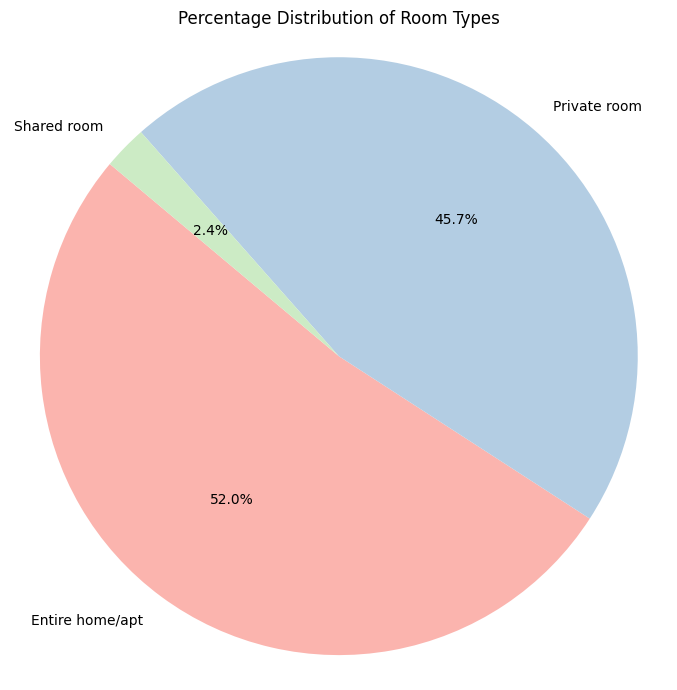

In [ ]:
#percentage of each room_type


plt.figure(figsize=(7,7))  # Adjust size as needed

plt.pie(
    room_type_percentage,
    labels=room_type_percentage.index,
    autopct='%1.1f%%',     # Show percentages
    startangle=140,        # Rotate start for better layout
    colors=plt.cm.Pastel1.colors  # Optional: custom colors
)

plt.title('Percentage Distribution of Room Types')
plt.axis('equal')  # Makes the pie chart circular
plt.tight_layout()
plt.show()

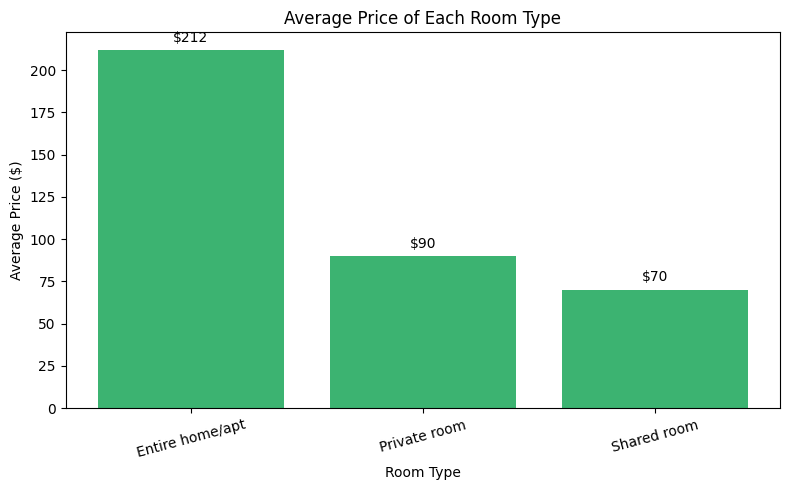

In [ ]:
#avg price of each room_type
avg_price_of_each_room_type = avg_price_of_each_room_type.reset_index()

plt.figure(figsize=(8, 5))

plt.bar(
    avg_price_of_each_room_type['room_type'],
    avg_price_of_each_room_type['price'],
    color='mediumseagreen'
)

plt.title('Average Price of Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=15)

# Add price labels on top of each bar (optional)
for i, price in enumerate(avg_price_of_each_room_type['price']):
    plt.text(i, price + 5, f"${price:.0f}", ha='center')

plt.tight_layout()
plt.show()

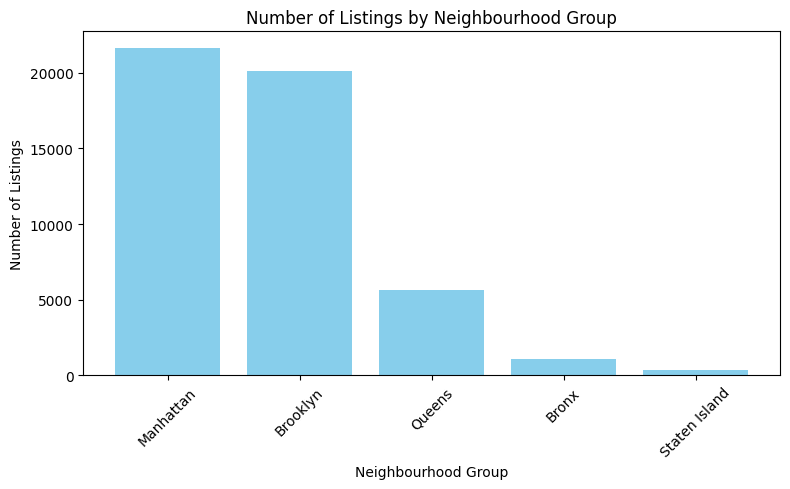

In [ ]:
#count listings of each neighbourhood group
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.bar(
    listings_per_neighbourhood['neighbourhood_group'],
    listings_per_neighbourhood['number_of_listings'],
    color='skyblue'
)

plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)  # rotate labels for better readability
plt.tight_layout()
plt.show()

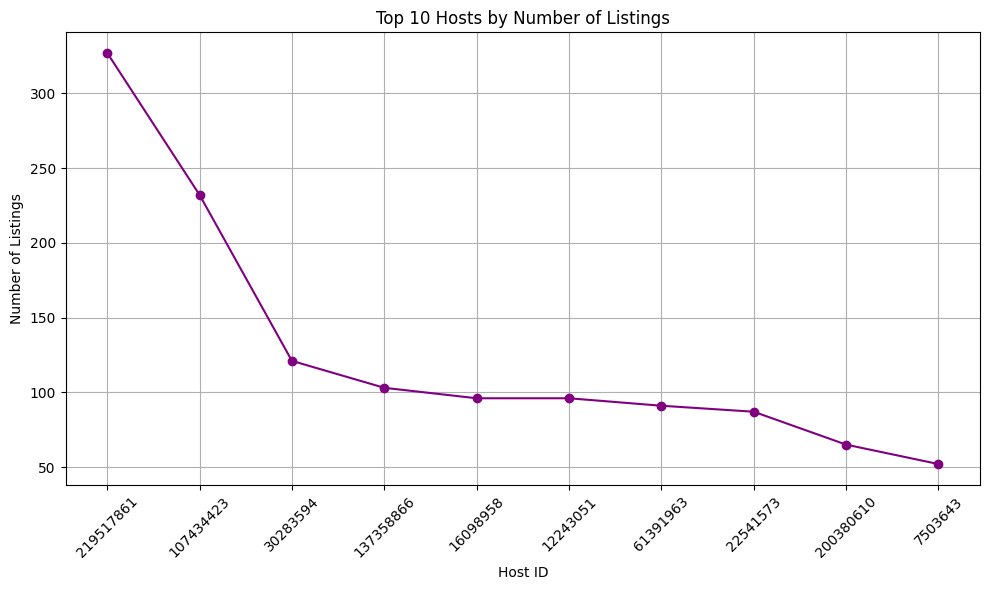

In [ ]:
#no of listings per host

top_hosts = listings_per_host.head(10)

plt.figure(figsize=(10,6))

plt.plot(
    top_hosts['host_id'].astype(str),  # convert host_id to string for x-axis labels
    top_hosts['number_of_listings'],
    marker='o', linestyle='-', color='purple'
)

plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

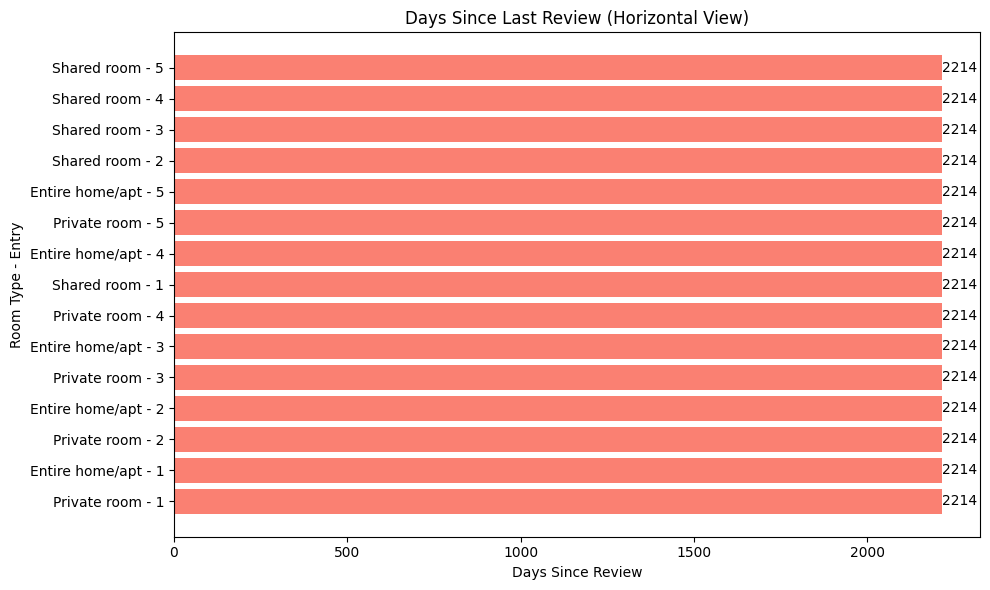

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.barh(
    last_5_reviews_per_room_sorted['label'],
    last_5_reviews_per_room_sorted['days_since_review'],
    color='salmon'
)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, int(xval), va='center')

plt.title('Days Since Last Review (Horizontal View)')
plt.xlabel('Days Since Review')
plt.ylabel('Room Type - Entry')
plt.tight_layout()
plt.show()

# Solution to Business Objective

1.  Room Type Distribution (Pie Chart)
Insight:

The market is dominated by Entire home/apt (52%) and Private room (45.7%), with Shared room (2.4%) barely present.

Recommendation:

Focus on listing Entire homes or Private rooms, since Shared rooms have low demand.

If operating on a limited budget, Private rooms offer a cost-effective entry point.

2. Average Price by Room Type (Bar Chart)
Insight:

Entire home/apt = $212, Private room = $90, Shared room = $70

Entire homes generate >2x revenue per night than private rooms.

Recommendation:

Consider investing in or converting properties into entire home listings to boost revenue.

Use dynamic pricing tools to optimize private/shared room rates closer to market ceiling.

3. Listings by Neighbourhood Group (Bar Chart)
Insight:

Manhattan & Brooklyn dominate listings.

Queens, Bronx, Staten Island are underrepresented.

Recommendation:

Opportunities exist in Queens/Bronx/Staten Island: less competition + likely lower property costs.

For Manhattan/Brooklyn: competitive edge required (better photos, pricing, reviews) to stand out.

4. 🧑‍💼 Top 10 Hosts by Number of Listings (Line Plot)
Insight:

A few hosts dominate the market with 100+ listings.

Indicates presence of professional property managers or companies.

Recommendation:

New hosts must invest in brand-building (e.g., Superhost status, automated responses).

Clients could consider scaling through co-hosting models or property management services.

5. Days Since Last Review by Room Type (horizontal bar graph)
Insight:

All room types show listings with >2200 days since last review, which is very outdated.

Recommendation:

These listings are likely inactive or performing poorly.

Suggest clients track reviews actively — lack of reviews lowers ranking & trust.

Use strategies like:

Offering discounts for early guests

Requesting reviews proactively

Optimizing communication for better guest experience

# Conclusion

The Airbnb market is currently dominated by entire home/apartment listings, especially in high-demand areas like Manhattan and Brooklyn, which also command the highest nightly rates. However, there is a promising opportunity to capture market share in underrepresented boroughs like Queens and the Bronx, where competition is lower.

To remain competitive against large-scale hosts, it is critical to optimize listing quality, pricing strategy, and guest engagement, especially by maintaining fresh reviews and responsive communication. Scaling via co-hosting or multi-property management can also be explored.

Overall, focusing on profitable listing types, under-tapped locations, and data-driven performance optimization will help achieve long-term growth and occupancy objectives in the Airbnb market.